## Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# loading the dataset and reading the first 5 rows.
wine = pd.read_csv('C:/Users/krrish/Downloads/winequality-red1.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape

(1599, 12)

As we can see, the name of some columns contains spaces, which is something we do not really want when treating data, this is why we are going to replace these spaces with "_".

In [4]:
#Replace spaces with _ for each column
wine.columns = wine.columns.str.replace(' ', '_')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## EDA

In [6]:
#We check for missing values
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values in the dataset.

In [7]:
#We check for duplicate values
wine.duplicated().sum()

240

In [8]:
wine[wine.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
wine.drop_duplicates(inplace=True)

In [10]:
wine.shape

(1359, 12)

In [11]:
wine['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Diversity of the quality of wine.')

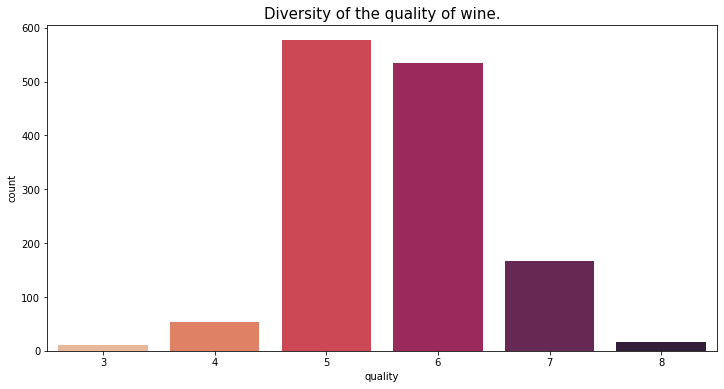

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='quality',data=wine, palette='rocket_r')
plt.title("Diversity of the quality of wine.", size =15)

## outlier treatment

In [13]:
wine.describe(percentiles=[0.01, .1, .25,.5,.75, .9,.95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
fixed_acidity,1359.0,8.310596,1.736990,4.60000,5.200000,6.500000,7.1000,7.9000,9.20000,10.7000,11.7100,11.968000,12.326000,12.60000,13.24200,15.90000
volatile_acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.310000,0.3900,0.5200,0.64000,0.7600,0.8505,0.880000,0.910000,0.96500,1.02920,1.58000
citric_acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.010000,0.0900,0.2600,0.43000,0.5300,0.6000,0.636800,0.660000,0.68000,0.70420,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.400000,1.700000,1.9000,2.2000,2.60000,3.4600,4.8000,5.500000,6.000000,6.59200,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.060000,0.0700,0.0790,0.09100,0.1100,0.1376,0.163720,0.180080,0.23584,0.36842,0.61100
free_sulfur_dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,5.000000,7.0000,14.0000,21.00000,31.0000,35.0000,37.000000,39.000000,42.00000,50.00000,72.00000
total_sulfur_dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,14.000000,22.0000,38.0000,63.00000,94.0000,113.0000,120.000000,127.000000,135.84000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.994472,0.9956,0.9967,0.99782,0.9991,0.9998,1.000084,1.000243,1.00060,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.120000,3.2100,3.3100,3.40000,3.5100,3.5700,3.580000,3.600000,3.63000,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.500000,0.5500,0.6200,0.73000,0.8500,0.9400,0.996800,1.060000,1.13840,1.28000,2.00000


#### outliers are present in the data, so we will cap them.

In [14]:
def outlier_capping(x):
    x = x.clip(upper = x.mean() + 3*x.std())
    x = x.clip(lower = x.mean() - 3*x.std())
    return x

In [15]:
data1 = wine.apply(outlier_capping)

### correlation matrix

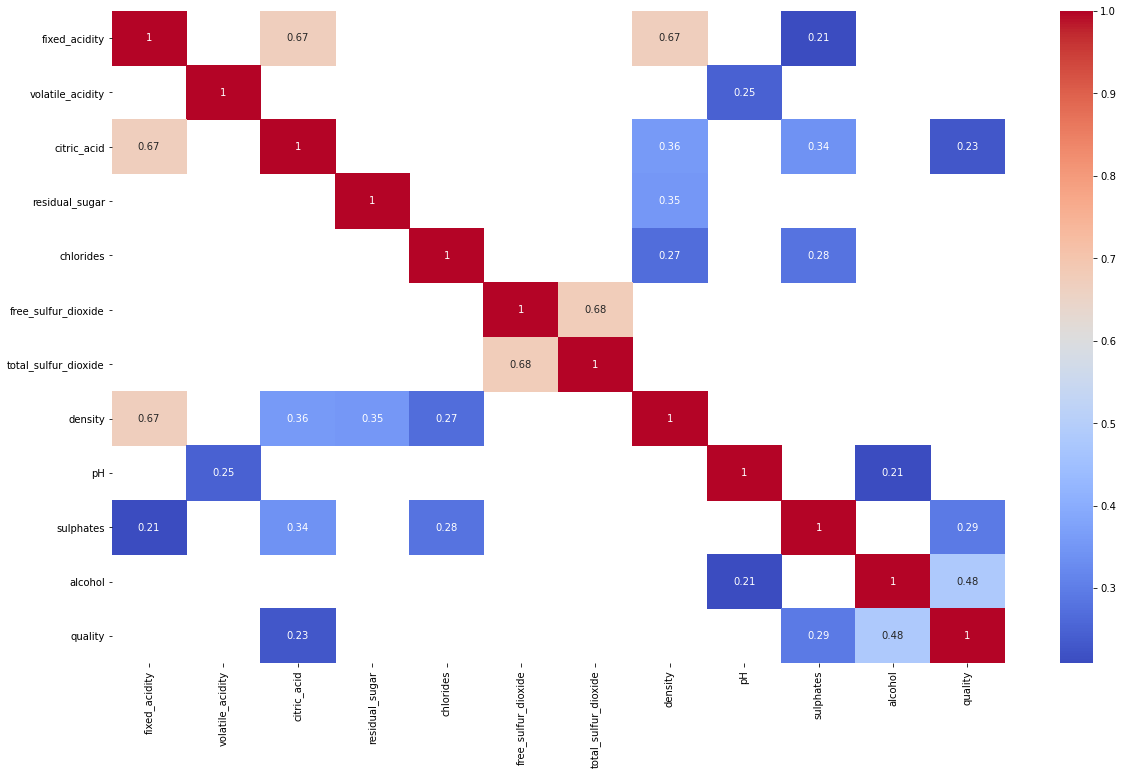

In [16]:
corr_matrix = data1.corr() 
#filter correlation values above 0.2
filter_corr = corr_matrix[corr_matrix > 0.2]
#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before.
From all these features, we are going to remove highly correlated variables.

In [17]:
data1.drop(columns=['free_sulfur_dioxide','fixed_acidity'],inplace=True)

### setting an arbitary cut-off on "wine quality" to make it a classification problem.

In [18]:
data1['quality'] = np.where(data1['quality']<6, 0,1)

In [19]:
data1.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,1
5,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,0


## Model building

In [20]:
X = data1.drop(columns=["quality"])
y = data1["quality"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=70)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log0 = LogisticRegression(max_iter=1000)

In [24]:
log0.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
print("Train Accuracy", log0.score(X_train,y_train))

Train Accuracy 0.7470101195952162


In [26]:
print("Test Accuracy", log0.score(X_test,y_test))

Test Accuracy 0.7352941176470589


In [27]:
pred_train = log0.predict(X_train)

In [28]:
from sklearn import metrics

In [29]:
metrics.confusion_matrix(y_train,pred_train)

array([[399, 124],
       [151, 413]], dtype=int64)

In [30]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       523
           1       0.77      0.73      0.75       564

    accuracy                           0.75      1087
   macro avg       0.75      0.75      0.75      1087
weighted avg       0.75      0.75      0.75      1087



In [31]:
pred_test = log0.predict(X_test)
pred_test

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1])

In [32]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       117
           1       0.79      0.72      0.76       155

    accuracy                           0.74       272
   macro avg       0.73      0.74      0.73       272
weighted avg       0.74      0.74      0.74       272



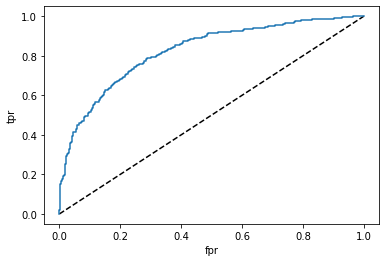

In [33]:
probs_log=log0.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs_log)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [34]:
metrics.roc_auc_score(y_train,probs_log) 

0.824129069877819

In [35]:
models_report=pd.DataFrame()
tmp3 = pd.Series({'Model': " Logisitic ",
                 'ROC Score' : metrics.roc_auc_score(y_train,probs_log),
                 'Precision Score': metrics.precision_score(y_test,pred_test),
                 'Recall Score': metrics.recall_score(y_test,pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test,pred_test),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,pred_test)})

model_log_report = models_report.append(tmp3, ignore_index = True)
model_log_report

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.735294,0.467855,Logisitic,0.794326,0.824129,0.722581


## dtree

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=70)

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt1=DecisionTreeClassifier()

dt1.fit(X_train, y_train)

print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.6875


In [38]:
dt1=DecisionTreeClassifier(max_depth=5,random_state=70)
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.7930082796688133
Test accuracy: 0.6801470588235294


In [39]:
dt1=DecisionTreeClassifier(max_depth=4,random_state=70)
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.7681692732290708
Test accuracy: 0.6727941176470589


In [40]:
dt2=DecisionTreeClassifier(max_depth=5, criterion="gini", min_samples_split=250)
dt2.fit(X_train, y_train)
print("Train accuracy:", dt2.score(X_train,y_train))
print("Test accuracy:", dt2.score(X_test,y_test))

Train accuracy: 0.7368905243790248
Test accuracy: 0.6838235294117647


In [41]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,4,6], 
              'max_depth':[4,5,7,10],
              "min_samples_leaf":[6,10,15,20]
     
             }

tr = DecisionTreeClassifier(random_state=70)

gsearch = GridSearchCV(tr, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=70), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [4, 5, 7, 10],
                         'min_samples_leaf': [6, 10, 15, 20],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [42]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [43]:
gsearch.best_score_

0.7120111613748785

In [44]:
dt3=DecisionTreeClassifier(max_depth=4, criterion="gini", 
                           min_samples_split=2,
                          min_samples_leaf= 10)
dt3.fit(X_train, y_train)
print("Train accuracy:", dt3.score(X_train,y_train))

print("Test accuracy:", dt3.score(X_test,y_test))

Train accuracy: 0.764489420423183
Test accuracy: 0.6764705882352942


In [45]:
pred_train_dt = dt2.predict(X_train)

In [46]:
pred_test_dt = dt2.predict(X_test)

In [47]:
print(metrics.classification_report(y_train,pred_train_dt))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       523
           1       0.73      0.77      0.75       564

    accuracy                           0.74      1087
   macro avg       0.74      0.74      0.74      1087
weighted avg       0.74      0.74      0.74      1087



In [48]:
print(metrics.classification_report(y_test,pred_test_dt))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       117
           1       0.72      0.74      0.73       155

    accuracy                           0.68       272
   macro avg       0.68      0.68      0.68       272
weighted avg       0.68      0.68      0.68       272



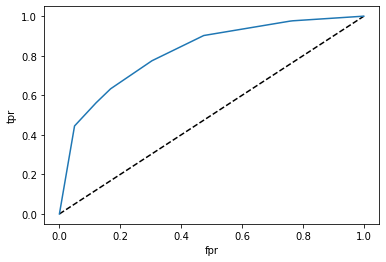

In [50]:
probs_dt=dt2.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs_dt)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [51]:
metrics.roc_auc_score(y_train,probs_dt)

0.8191506312463556

In [53]:
models_report_dt=pd.DataFrame()
tmp3 = pd.Series({'Model': " Decision Tree Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_train,probs_dt),
                 'Precision Score': metrics.precision_score(y_test, pred_test_dt),
                 'Recall Score': metrics.recall_score(y_test, pred_test_dt),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_dt),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, pred_test_dt)})

model_dt1_report = models_report_dt.append(tmp3, ignore_index = True)
model_dt1_report

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.683824,0.352345,Decision Tree Classifier,0.716981,0.819151,0.735484


## rf

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf1=RandomForestClassifier(n_estimators=100,random_state=70)

In [56]:
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 1.0
Test Accuracy : 0.7463235294117647


In [57]:
rf1=RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 0.8141674333026679
Test Accuracy : 0.7169117647058824


In [58]:
from sklearn.model_selection import GridSearchCV

fit_rf = RandomForestClassifier(random_state=42)

param_dist = {'max_depth':[5,7,10],
              'min_samples_split':[4,6,10,15],
              'n_estimators':[ 20,40,50, 100],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=0)

cv_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [4, 6, 10, 15],
                         'n_estimators': [20, 40, 50, 100]})

In [59]:
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 6,
 'n_estimators': 50}

In [60]:
cv_rf.best_score_

0.7672273190621814

In [61]:
rf2=RandomForestClassifier(n_estimators=cv_rf.best_params_['n_estimators'],
                           max_depth=cv_rf.best_params_['max_depth'], 
                           min_samples_split=cv_rf.best_params_["min_samples_split"],
                           criterion=cv_rf.best_params_['criterion'],
                           random_state=42
                          )
rf2.fit(X_train, y_train)
print("Train Accuracy :", rf2.score(X_train,y_train))
print("Test Accuracy :", rf2.score(X_test,y_test))

Train Accuracy : 0.8804047838086476
Test Accuracy : 0.7279411764705882


In [73]:
rf3=RandomForestClassifier(n_estimators=50,
                           max_depth=4, 
                           min_samples_split=20,
                           criterion='gini',
                           random_state=70
                          )
rf3.fit(X_train, y_train)
print("Train Accuracy :", rf3.score(X_train,y_train))
print("Test Accuracy :", rf3.score(X_test,y_test))

Train Accuracy : 0.7865685372585096
Test Accuracy : 0.7426470588235294


In [74]:
pred_train_rf = rf3.predict(X_train)

In [75]:
pred_test_rf = rf3.predict(X_test)

In [76]:
print(metrics.classification_report(y_train,pred_train_rf))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       523
           1       0.80      0.78      0.79       564

    accuracy                           0.79      1087
   macro avg       0.79      0.79      0.79      1087
weighted avg       0.79      0.79      0.79      1087



In [77]:
print(metrics.classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       117
           1       0.79      0.74      0.77       155

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.75      0.74      0.74       272



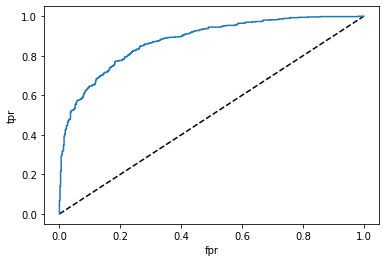

In [78]:
probs_rf=rf3.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [79]:
metrics.roc_auc_score(y_train,probs_rf)

0.8763069037061144

In [80]:
models_report_rf=pd.DataFrame()
tmp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_train,probs_rf),
                 'Precision Score': metrics.precision_score(y_test, pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_rf),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, pred_test_rf)})

model_rf1_report = models_report_rf.append(tmp3, ignore_index = True)
model_rf1_report

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.742647,0.480491,Random Forest Classifier,0.793103,0.876307,0.741935


## XG BOOST

In [81]:
from xgboost import XGBClassifier

In [82]:
Xgbr = XGBClassifier(learning_rate=1.0, max_depth=7,n_estimators=100 ,use_label_encoder=False)

Xgbr.fit(X_train, y_train)
print("Train Accuracy:", Xgbr.score(X_train, y_train))
print("Test Accuracy:", Xgbr.score(X_test,y_test))

[00:36:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy: 1.0
Test Accuracy: 0.7205882352941176


In [83]:
Xgbr1 = XGBClassifier(learning_rate=1.5, max_depth=5,n_estimators=20,min_child_weight=5)

Xgbr1.fit(X_train, y_train)

print("Train Accuracy:", Xgbr1.score(X_train, y_train))
print("Test Accuracy:", Xgbr1.score(X_test,y_test))

[00:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy: 0.9475620975160993
Test Accuracy: 0.7279411764705882


C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [84]:
from sklearn.model_selection import RandomizedSearchCV

params =  {'max_depth': [2,5,6,10],
            'learning_rate':[0.5,1.0,1.5],
            'n_estimators': [10,20,40],
            'min_child_weight': [5,10,20,40]
     
              }

xgb_clf = XGBClassifier(random_state=89)

xgb_clf_grid = RandomizedSearchCV(xgb_clf, params, cv=5, verbose=1, n_jobs=-1)

xgb_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [86]:
xgb_clf_grid.best_params_

{'n_estimators': 10,
 'min_child_weight': 20,
 'max_depth': 2,
 'learning_rate': 0.5}

In [87]:
xgb_clf_grid.best_score_

0.7469919249143872

In [89]:
xgb3 = XGBClassifier(learning_rate=xgb_clf_grid.best_params_['learning_rate'],
                     max_depth=xgb_clf_grid.best_params_['max_depth'], 
                     n_estimators=xgb_clf_grid.best_params_['n_estimators'],
                     min_child_weight=xgb_clf_grid.best_params_['min_child_weight'])

xgb3.fit(X_train, y_train)

print("Train Accuaracy:", xgb3.score(X_train, y_train))
print("Test Accuaracy:", xgb3.score(X_test,y_test))

[00:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuaracy: 0.7736890524379025
Test Accuaracy: 0.7352941176470589


In [90]:
Xgb_y_Pred_train = xgb3.predict(X_train)
Xgb_y_Pred_test = xgb3.predict(X_test)

In [91]:
print(metrics.classification_report(y_train, Xgb_y_Pred_train))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       523
           1       0.79      0.77      0.78       564

    accuracy                           0.77      1087
   macro avg       0.77      0.77      0.77      1087
weighted avg       0.77      0.77      0.77      1087



In [92]:
print(metrics.classification_report(y_test, Xgb_y_Pred_test))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       117
           1       0.78      0.75      0.76       155

    accuracy                           0.74       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.74      0.74       272



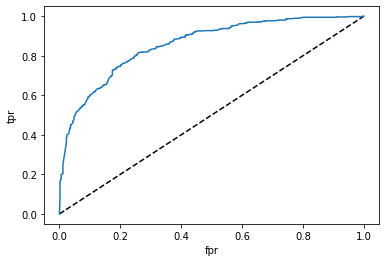

In [94]:
probs_xgb=xgb3.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs_xgb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [95]:
metrics.roc_auc_score(y_train,probs_xgb)

0.8577288691808036

In [96]:
models_report_xgb=pd.DataFrame()
tmp3 = pd.Series({'Model': " Xgboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_train,probs_xgb),
                 'Precision Score': metrics.precision_score(y_test, Xgb_y_Pred_test),
                 'Recall Score': metrics.recall_score(y_test, Xgb_y_Pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, Xgb_y_Pred_test),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, Xgb_y_Pred_test)})

model_xgb_report = models_report_xgb.append(tmp3, ignore_index = True)
model_xgb_report

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.735294,0.463423,Xgboost Classifier,0.778523,0.857729,0.748387


## adaboost

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
clf_ABC = AdaBoostClassifier(n_estimators=200,
                         learning_rate=1,
                         random_state=70)

In [99]:
# Train model
clf_ABC = clf_ABC.fit(X_train,y_train)
print ("Train Accuracy:", clf_ABC.score(X_train, y_train))
print ("Test Accuracy:", clf_ABC.score(X_test, y_test))

Train Accuracy: 0.8160073597056118
Test Accuracy: 0.7132352941176471


In [100]:
clf_ABC1 = AdaBoostClassifier(n_estimators=150,learning_rate=0.5,random_state=70)

clf_ABC1 = clf_ABC1.fit(X_train,y_train)
print ("Train Accuracy:", clf_ABC1.score(X_train, y_train))
print ("Test Accuracy:", clf_ABC1.score(X_test, y_test))

Train Accuracy: 0.8031278748850046
Test Accuracy: 0.7426470588235294


In [101]:
y_pred_ABC1 = clf_ABC1.predict(X_test)
y_train_ABC1 = clf_ABC1.predict(X_train)

In [102]:
print(metrics.classification_report(y_train, y_train_ABC1))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       523
           1       0.82      0.80      0.81       564

    accuracy                           0.80      1087
   macro avg       0.80      0.80      0.80      1087
weighted avg       0.80      0.80      0.80      1087



In [103]:
print(metrics.classification_report(y_test, y_pred_ABC1))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       117
           1       0.78      0.77      0.77       155

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272



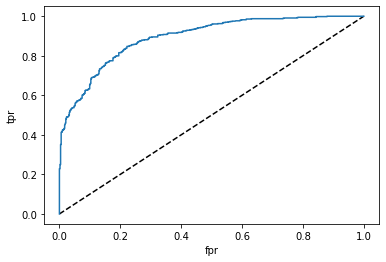

In [104]:
probs_ada=clf_ABC1.predict_proba(X_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs_ada)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [105]:
metrics.roc_auc_score(y_train,probs_ada)

0.8926508278751881

In [106]:
models_report_ada=pd.DataFrame()
tmp3 = pd.Series({'Model': " Ada boost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_train,probs_ada),
                 'Precision Score': metrics.precision_score(y_test, y_pred_ABC1),
                 'Recall Score': metrics.recall_score(y_test, y_pred_ABC1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_ABC1),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_ABC1)})

model_ada_report = models_report_ada.append(tmp3, ignore_index = True)
model_ada_report

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.742647,0.476146,Ada boost Classifier,0.777778,0.892651,0.767742


## svm

In [107]:
from sklearn import metrics
from sklearn import svm 

In [108]:
from sklearn.preprocessing import StandardScaler  
import numpy as np

# standardized the dataset
sc=StandardScaler()
sc_fit=sc.fit(X_train)

In [109]:
X_train_sc=sc_fit.transform(X_train)
X_test_sc=sc_fit.transform(X_test)

In [110]:
X_train_sc_df=pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc_df=pd.DataFrame(X_test_sc, columns=X_test.columns)

In [111]:
sv1=svm.LinearSVC()

sv1.fit(X_train_sc_df, y_train)
print("Train score :", sv1.score(X_train_sc_df, y_train))
print("Test score :", sv1.score(X_test_sc_df, y_test))

Train score : 0.7460901563937442
Test score : 0.7316176470588235


C:\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [112]:
sv1=svm.LinearSVC(C=10)

sv1.fit(X_train_sc_df, y_train)
print("Train score :", sv1.score(X_train_sc_df, y_train))
print("Test score :", sv1.score(X_test_sc_df, y_test))

Train score : 0.7488500459981601
Test score : 0.7316176470588235


C:\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [113]:
sv2=svm.SVC(probability=True)
sv2.fit(X_train_sc_df, y_train)
print("Train score :", sv2.score(X_train_sc_df, y_train))
print("Test score :", sv2.score(X_test_sc_df, y_test))

Train score : 0.7828886844526219
Test score : 0.7389705882352942


In [114]:
sv2=svm.SVC(kernel="linear", C=10)
sv2.fit(X_train_sc_df, y_train)
print("Train score :", sv2.score(X_train_sc_df, y_train))
print("Test score :", sv2.score(X_test_sc_df, y_test))

Train score : 0.7442502299908004
Test score : 0.7316176470588235


In [115]:
sv2=svm.SVC(kernel="rbf")
sv2.fit(X_train_sc_df, y_train)
print("Train score :", sv2.score(X_train_sc_df, y_train))
print("Test score :", sv2.score(X_test_sc_df, y_test))

Train score : 0.7828886844526219
Test score : 0.7389705882352942


In [116]:
sv2=svm.SVC(kernel="poly", degree=1)
sv2.fit(X_train_sc_df, y_train)
print("Train score :", sv2.score(X_train_sc_df, y_train))
print("Test score :", sv2.score(X_test_sc_df, y_test))

Train score : 0.7442502299908004
Test score : 0.7352941176470589


In [117]:
from sklearn.model_selection import GridSearchCV

params={"kernel":['linear', 'poly', 'rbf'],
       "degree":[2,3,4],
       "gamma":[0.1, 1,.001],
       "C":[1, 10, 100]
       }
sv=svm.SVC()
svm_rs=GridSearchCV(sv, params, cv=10, n_jobs=-1, verbose=True)
svm_rs.fit(X_train_sc_df, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [118]:
svm_rs.best_params_

{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

In [119]:
svm_rs.best_score_

0.7470438328236493

In [120]:
sv3=svm.SVC(kernel=svm_rs.best_params_['kernel'], 
            degree=svm_rs.best_params_['degree'], 
            probability=True,
            C=svm_rs.best_params_['C'],
            gamma=svm_rs.best_params_['gamma'])
sv3.fit(X_train_sc_df, y_train)
print("Train score :", sv3.score(X_train_sc_df, y_train))
print("Test score :", sv3.score(X_test_sc_df, y_test))

Train score : 0.7506899724011039
Test score : 0.7389705882352942


In [121]:
pred_train_sv = sv3.predict(X_train_sc_df)
pred_test_sv = sv3.predict(X_test_sc_df)

In [122]:
print(metrics.classification_report(y_train,pred_train_sv))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       523
           1       0.78      0.72      0.75       564

    accuracy                           0.75      1087
   macro avg       0.75      0.75      0.75      1087
weighted avg       0.75      0.75      0.75      1087



In [123]:
print(metrics.classification_report(y_test,pred_test_sv))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       117
           1       0.80      0.73      0.76       155

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272



function for auc curve

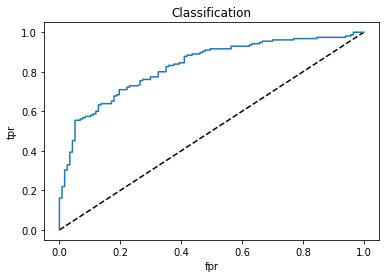

{'Accuracy': 0.7389705882352942, 'Recall': 0.7290322580645161, 'Precision': 0.795774647887324, 'F1_Score': 0.7609427609427609, 'FPR': 0.3230769230769231, 'AUC': 0.8287565481113869}


{'Accuracy': 0.7389705882352942,
 'Recall': 0.7290322580645161,
 'Precision': 0.795774647887324,
 'F1_Score': 0.7609427609427609,
 'FPR': 0.3230769230769231,
 'AUC': 0.8287565481113869}

In [124]:
def model_evaluation(X,y, trained_model, name_of_model="Classification"):
    """
    This function will return the performance metrics for classification model 
    i.e. accuracy , recall etc
    """
    from sklearn import metrics
    x1=X.copy()
    y1=y.copy()
    p_y1=trained_model.predict(x1)
    mt=metrics.confusion_matrix(y1, p_y1)
    Accuracy =(mt[0,0]+mt[1,1])/x1.shape[0]
    Recall= mt[1,1]/ ( mt[1,0]+mt[1,1])
    Precision= mt[1,1]/ ( mt[0,1]+mt[1,1])
    F1_Score = (2*Recall*Precision)/ (Recall+Precision)
    FPR=mt[1,0]/ (mt[1,0]+mt[0,0])
    
    probs=trained_model.predict_proba(x1)[:,1]
    
    fpr, tpr, threshold=metrics.roc_curve(y1,probs )
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.title(name_of_model)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
#     f=pd.DataFrame(performance)
    performance={"Accuracy":Accuracy, "Recall":Recall, 
                 "Precision" :Precision, "F1_Score":F1_Score,
                 "FPR":FPR,
                "AUC":metrics.roc_auc_score(y1,probs)}
    print(performance)
    return performance
a = model_evaluation(X_test_sc_df, y_test, sv3)
a

In [125]:
models_report_svm=pd.DataFrame()
tmp3 = pd.Series({'Model': " SVM ",
                 'ROC Score' : a['AUC'],
                 'Precision Score': a['Precision'],
                 'Recall Score': a['Recall'],
                 'Accuracy Score': a['Accuracy']})

model_svm_report = models_report_svm.append(tmp3, ignore_index = True)
model_svm_report

,Accuracy Score,Model,Precision Score,ROC Score,Recall Score
0,0.738971,SVM,0.795775,0.828757,0.729032


## KNN

In [126]:
X_train, X_test, y_train , y_test=train_test_split(X, y, test_size=.25, random_state=88)

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [128]:
scale=MinMaxScaler()

X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)
# X_train_scaled

In [129]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [130]:
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("Train Score :", knn.score(X_train_scaled, y_train))
print("Test Score :", knn.score(X_test_scaled, y_test)) 

Train Score : 0.8105986261040236
Test Score : 0.6794117647058824


graph for optimal value of k

In [132]:
k=[]
accuracy_train=[]
accuracy_test=[]
for i in range(1,50,2):
    knni=KNeighborsClassifier(n_neighbors=i)
    knni.fit(X_train_scaled, y_train)
    accuracy_train.append(knni.score(X_train_scaled, y_train))
    accuracy_test.append(knni.score(X_test_scaled, y_test))
    k.append(i)

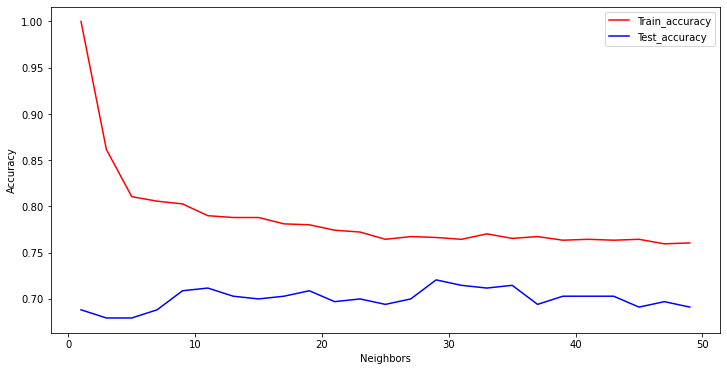

In [133]:
plt.figure( figsize=(12,6))
plt.plot(k, accuracy_train, label="Train_accuracy", color="r")
plt.plot(k, accuracy_test, label="Test_accuracy", color="b")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [134]:
knn1=KNeighborsClassifier(n_neighbors=29)
knn1.fit(X_train_scaled, y_train)
print("Train Score :", knn1.score(X_train_scaled, y_train))
print("Test Score :", knn1.score(X_test_scaled, y_test)) 

Train Score : 0.7664376840039254
Test Score : 0.7205882352941176


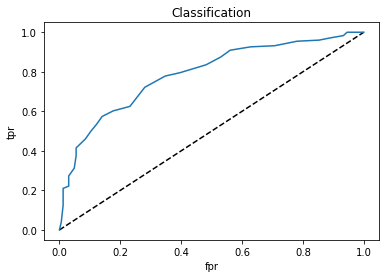

{'Accuracy': 0.7205882352941176, 'Recall': 0.7215909090909091, 'Precision': 0.7341040462427746, 'F1_Score': 0.7277936962750717, 'FPR': 0.2934131736526946, 'AUC': 0.7872436252771619}


In [135]:
b= model_evaluation(X_test_scaled, y_test, knn1)

In [136]:
models_report_knn=pd.DataFrame()
tmp3 = pd.Series({'Model': " KNN ",
                 'ROC Score' : b['AUC'],
                 'Precision Score': b['Precision'],
                 'Recall Score': b['Recall'],
                 'Accuracy Score': b['Accuracy']})

model_knn_report = models_report_knn.append(tmp3, ignore_index = True)
model_knn_report

,Accuracy Score,Model,Precision Score,ROC Score,Recall Score
0,0.720588,KNN,0.734104,0.787244,0.721591


## Naive bayes

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=88)

In [138]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB

mn=MinMaxScaler()

mn_fit=mn.fit(X_train)

X_train_mn=mn_fit.transform(X_train)

X_test_mn=mn_fit.transform(X_test)

X_train_mn=pd.DataFrame(X_train_mn,columns=X_train.columns)

X_test_mn=pd.DataFrame(X_test_mn,columns=X_test.columns)

In [139]:
nbm=GaussianNB()

In [140]:
mm=GaussianNB()
mm.fit(X_train_mn,y_train)
print("Train Accuracy ",mm.score(X_train_mn,y_train))
print("Test Accuracy ",mm.score(X_test_mn,y_test))

Train Accuracy  0.7487733071638861
Test Accuracy  0.6764705882352942


In [141]:
nbm0=nbm.fit(X_train_mn, y_train)

In [142]:
pred_train=mm.predict(X_train_mn)
pred_test=mm.predict(X_test_mn)

In [143]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       476
           1       0.77      0.75      0.76       543

    accuracy                           0.75      1019
   macro avg       0.75      0.75      0.75      1019
weighted avg       0.75      0.75      0.75      1019



In [144]:
print(metrics.classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       164
           1       0.73      0.60      0.66       176

    accuracy                           0.68       340
   macro avg       0.68      0.68      0.68       340
weighted avg       0.68      0.68      0.67       340



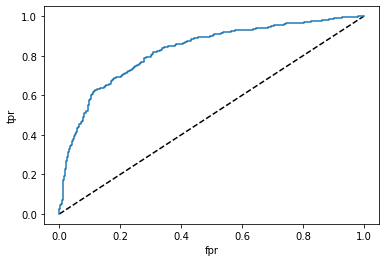

In [145]:
probs_nb=mm.predict_proba(X_train_mn)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs_nb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [146]:
metrics.roc_auc_score(y_train,probs_nb)

0.8270346812758252

In [147]:
models_report_nb=pd.DataFrame()
tmp3 = pd.Series({'Model': " Naive Bayes ",
                 'ROC Score' : metrics.roc_auc_score(y_train,probs_nb),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, pred_test)})

model_nb_report = models_report_nb.append(tmp3, ignore_index = True)
model_nb_report

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.676471,0.356149,Naive Bayes,0.726027,0.827035,0.602273


## Model evaluation

In [148]:
review = pd.concat([model_log_report,model_dt1_report,model_rf1_report,model_nb_report,model_xgb_report,
                    model_ada_report,model_knn_report,model_svm_report], ignore_index=True)

In [149]:
review

,Accuracy Score,Kappa Score,Model,Precision Score,ROC Score,Recall Score
0,0.735294,0.467855,Logisitic,0.794326,0.824129,0.722581
1,0.683824,0.352345,Decision Tree Classifier,0.716981,0.819151,0.735484
2,0.742647,0.480491,Random Forest Classifier,0.793103,0.876307,0.741935
3,0.676471,0.356149,Naive Bayes,0.726027,0.827035,0.602273
4,0.735294,0.463423,Xgboost Classifier,0.778523,0.857729,0.748387
5,0.742647,0.476146,Ada boost Classifier,0.777778,0.892651,0.767742
6,0.720588,NaN,KNN,0.734104,0.787244,0.721591
7,0.738971,NaN,SVM,0.795775,0.828757,0.729032


### According to the evaluation , we can use either xgboost or ada boost as they are the best models.